# Домашнее задание №14. Продолжение OpenCV

## Задание 1
Выбрать изображение, содержащее не менее 3-х одинаковых объектов. Составить изображение (шаблон) из точек, соответствующих положению объекта на изображении. Находя совпадения по шаблону, выделить каждое из них в черную рамку.

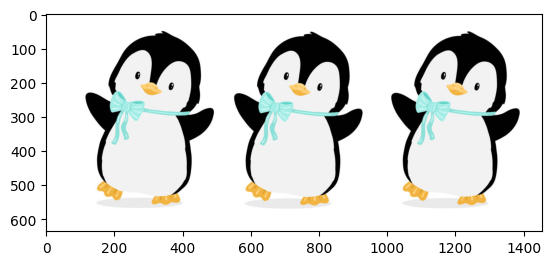

In [7]:
# Напишите свой код в данной ячейке
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
picture = cv2.imread('3 объекта.png')
plt.imshow(cv2.cvtColor(picture, cv2.COLOR_BGR2RGB))

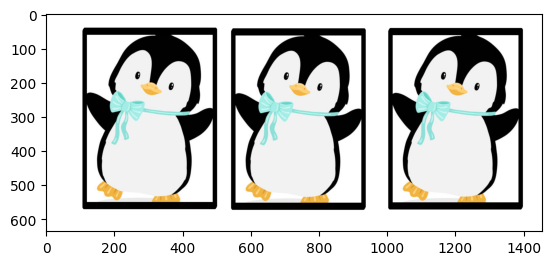

In [ ]:
template = cv2.imread('template.png', 0)
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
plt.imshow(template)
img_gray = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(picture, pt, (pt[0] + w, pt[1] + h), (0,0,0), 1)

plt.imshow(cv2.cvtColor(picture, cv2.COLOR_BGR2RGB))

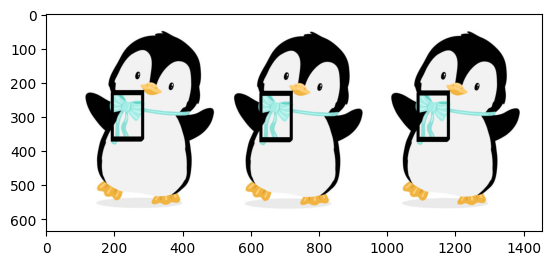

In [ ]:
template2 = cv2.imread('template2.png', 0)
template2 = cv2.cvtColor(template2, cv2.COLOR_BGR2RGB)
template2 = cv2.cvtColor(template2, cv2.COLOR_BGR2GRAY)
plt.imshow(template2)

img_gray = cv2.cvtColor(picture, cv2.COLOR_BGR2GRAY)
w, h = template2.shape[::-1]

res = cv2.matchTemplate(img_gray, template2, cv2.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where(res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(picture, pt, (pt[0] + w, pt[1] + h), (0,0,0), 1)

plt.imshow(cv2.cvtColor(picture, cv2.COLOR_BGR2RGB))

# Задание №2

Заснять на веб-камеру или скачать с интернета цветное видео (файл_1) длинной не менее 50 с, в котором человек производит какие-либо движения (допустимы даже минимальные: необходимо, чтобы его лицо не было зафиксировано в одном положении в течение видео) и при этом большую часть времени смотрит в объектив камеры (но не все время, т.е. человек может отворачиваться, посмотреть в другую сторону). Необходимо к каждому кадру видеопотока применять различные преобразования, так что в видео:
* [0c; 5c): кадр без изменений
* [6c; 10c): размытие с квадратной матрицей из 1 размером 3,
* [10c; 15c): размытие с квадратной матрицей из 1 размером 5,
* [15c; 20c): размытие с квадратной матрицей из 1 размером 9.
* [20c; 25c): размытие с квадратной матрицей из 1 размером 15.
* [25c; 30c): обнулить цветовой канал первый (B)
* [30c; 35c): обнулить второй цветовой канал (G)
* [35c; 40c): обнулить второй цветовой канал (R)
* [40c; 45с): применить эрозию с ядром размером 3
* [45c; 50с): применить эрозию с ядром размером 5

Записать сохранить модифицированную видеозапись в файл2.

In [ ]:
import cv2
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')
gc_folder = r"/content/gdrive/My Drive/Цифровая кафедра/14/"
my_file = gc_folder + 'videotask2.mov'

# Напишите свой код в данной ячейке
cap = cv2.VideoCapture(my_file)

if not cap.isOpened():
    print("Ошибка: Не удалось открыть видеофайл.")
    exit()

fourcc = cv2.VideoWriter_fourcc(*'FMP4')
FPS = 30.0
cols = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
rows = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('file2.mp4', fourcc, FPS, (cols,rows))

# без изменений
for seconds in range(0, 5):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret==True:
            out.write(frame)
        else:
            break

# матрица 3х3
for seconds in range(5, 10):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret:
            kernel_3x3 = np.ones((3,3), np.float32) / 9.0
            frame = cv2.filter2D(frame, -1, kernel_3x3)
            out.write(frame)
        else:
            break

# матрица 5х5
for seconds in range(10, 15):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret:
            kernel_5x5 = np.ones((5,5), np.float32) / 25.0
            frame = cv2.filter2D(frame, -1, kernel_5x5)
            out.write(frame)
        else:
            break

# матрица 9х9
for seconds in range(15, 20):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret:
            kernel_9x9 = np.ones((9,9), np.float32) / 81.0
            frame = cv2.filter2D(frame, -1, kernel_9x9)
            out.write(frame)
        else:
            break

# матрица 15х15
for seconds in range(20, 25):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret:
            kernel_15x15 = np.ones((15,15), np.float32) / 225.0
            frame = cv2.filter2D(frame, -1, kernel_15x15)
            out.write(frame)
        else:
            break

# обнулить B
for seconds in range(25, 30):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret:
            frame[:,:,0] = 0
            out.write(frame)
        else:
            break

# обнулить G
for seconds in range(30, 35):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret:
            frame[:,:,1] = 0
            out.write(frame)
        else:
            break

# обнулить R
for seconds in range(35, 40):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret:
            frame[:,:,2] = 0
            out.write(frame)
        else:
            break

# эрозия 3х3
for seconds in range(40, 45):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret:
            kernel_3 = np.ones((3,3), np.uint8)
            frame = cv2.erode(frame, kernel_3, iterations=1)
            out.write(frame)
        else:
            break

# эрозия 5х5
for seconds in range(45, 50):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret:
          kernel_5 = np.ones((5,5), np.uint8)
          frame = cv2.erode(frame, kernel_5, iterations=1)
          out.write(frame)
        else:
            break

cap.release()
out.release()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Задание №3

Написать программу, которая к видео из файла2 применяет признаки Хаара, детектирует лица и обводит их в прямоугольную рамку. Записать полученное видео в файл3. Сделать выводы о том насколько ухудшение качества видеопотока влияет на определение лиц с помощью признаков Хаара.

In [ ]:
# Напишите свой код в данной ячейке
import cv2
import numpy as np
cap = cv2.VideoCapture('file2.mp4')
fourcc = cv2.VideoWriter_fourcc(*'FMP4')
FPS = cap.get(cv2.CAP_PROP_FPS)
cols = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
rows = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
out = cv2.VideoWriter('file3.mp4',fourcc, FPS, (cols,rows))
while(True):
    ret, img = cap.read()
    if ret==True:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        face_cascade_db = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
        faces = face_cascade_db.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=20)
        for (x,y,w,h) in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)
        out.write(img)
    else:
        break

cap.release()
out.release()